In [15]:
# 分割西瓜，哈密瓜的训练集和测试集
import os
import shutil
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE): # 跳过0长度的文件
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


XIGUA_SOURCE_DIR = "E://机器学习//fruit//train_xigua//train/"
TRAINING_XIGUA_DIR = "E://机器学习//fruit//find_fruit4//train//xigua/"
TESTING_XIGUA_DIR = "E://机器学习//fruit//find_fruit4//test//xigua/"
HAMI_SOURCE_DIR = "E://机器学习//fruit//train_hami//train/"
TRAINING_HAMI_DIR = "E://机器学习//fruit//find_fruit4//train//hami/"
TESTING_HAMI_DIR = "E://机器学习//fruit//find_fruit4//test//hami/"

def create_dir(file_dir):
    if os.path.exists(file_dir):
        print('true')
        shutil.rmtree(file_dir) # 删除再建立
        os.makedirs(file_dir)
    else:
        os.makedirs(file_dir)

create_dir(TRAINING_XIGUA_DIR)
create_dir(TESTING_XIGUA_DIR)
create_dir(TRAINING_HAMI_DIR)
create_dir(TESTING_HAMI_DIR)

split_size = .9
split_data(XIGUA_SOURCE_DIR, TRAINING_XIGUA_DIR, TESTING_XIGUA_DIR, split_size)
split_data(HAMI_SOURCE_DIR, TRAINING_HAMI_DIR, TESTING_HAMI_DIR, split_size)

true
true
true
true


In [16]:
#网络模型构建
from tensorflow.keras import layers
from tensorflow.keras import models
#keras的序贯模型
model = models.Sequential()
#卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层，卷积核2*2，激活函数relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#flatten层，用于将多维的输入一维化，用于卷积层和全连接层的过渡
model.add(layers.Flatten())
#全连接，激活函数relu
model.add(layers.Dense(512, activation='relu'))
#全连接，激活函数sigmoid
model.add(layers.Dense(1, activation='sigmoid'))
#显示
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [17]:
from tensorflow import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 所有图像将按1/255重新缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 这是目标目录
        train_dir,
        # 所有图像将调整为150x150
        target_size=(150, 150),
        batch_size=20,
        # 因为我们使用二元交叉熵损失，我们需要二元标签
        class_mode='binary')


validation_generator=train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 169s 2s/step - loss: 0.3935 - acc: 0.8235 - val_loss: 0.4773 - val_acc: 0.7780
Epoch 2/30
100/100 [==============================] - 168s 2s/step - loss: 0.3728 - acc: 0.8395 - val_loss: 0.4156 - val_acc: 0.8170
Epoch 3/30
100/100 [==============================] - 91s 909ms/step - loss: 0.3739 - acc: 0.8340 - val_loss: 0.4165 - val_acc: 0.8190
Epoch 4/30
100/100 [==============================] - 83s 828ms/step - loss: 0.3676 - acc: 0.8375 - val_loss: 0.3854 - val_acc: 0.8430
Epoch 5/30
100/100 [==============================] - 77s 766ms/step - loss: 0.3816 - acc: 0.8270 - val_loss: 0.3883 - val_acc: 0.8220
Epoch 6/30
100/100 [==============================] - 74s 739ms/step - loss: 0.3987 - acc: 0.8155 - val_loss: 0.4104 - val_acc: 0.8150
Epoch 7/30
100/100 [==============================] - 74s 744ms/step - loss: 0.3499 - acc: 0.8480 - val_loss: 0.4110 - val_acc: 0.8310
Epoch 8/30
100/100 [==============================] - 86s 8

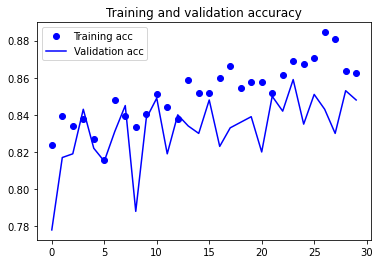

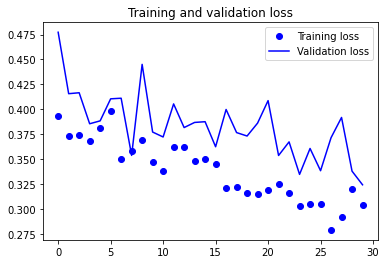

In [34]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()